In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import dataset
hrt = pd.read_csv('dataset/heart.csv')
hrt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
type(hrt)

pandas.core.frame.DataFrame

In [4]:
# jumlah kolom dan baris
hrt.shape

(303, 14)

In [5]:
# check data statistik dasar dari semua data set
hrt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# check info struktur data 
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
info = ["age","1: male, 0: female",
        "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
        "resting blood pressure",
        " serum cholestoral in mg/dl",
        "fasting blood sugar > 120 mg/dl",
        "resting electrocardiographic results (values 0,1,2)",
        " maximum heart rate achieved","exercise induced angina",
        "oldpeak = ST depression induced by exercise relative to rest",
        "the slope of the peak exercise ST segment",
        "number of major vessels (0-3) colored by flourosopy",
        "thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(hrt.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [8]:
# misahin fitur dengan target
feature_cols = ['age',
               'sex',
               'cp',
               'trestbps',
               'chol',
               'fbs',
               'restecg',
               'thalach',
               'exang',
               'oldpeak',
               'slope',
               'ca',
               'thal',
               'target']
df_feature=hrt[feature_cols]

target = hrt['target']

In [9]:
# memisah kan data
y =hrt.target.values
x =hrt.drop(["target"],axis=1)

In [10]:
# Normalization 
x = (x - np.min(x))/(np.max(x)-np.min(x)).values

In [11]:
# Split untuk Train dan test 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x,y,test_size=0.2, random_state=42)

In [12]:
# transposition
xtrain = xtrain.T
xtest = xtest.T
ytrain = ytrain.T
ytest = ytest.T

# LogisticRegression

In [13]:
accuracies={}
from sklearn.metrics import confusion_matrix
LR = LogisticRegression()
LR.fit(xtrain.T,ytrain.T)
LR.predict(xtest.T)

acc = LR.score(xtest.T,ytest.T)*100
accuracies['Logistic Regression'] = acc

print ('Test Accuracy {:.2f}%'.format(acc)) 

Test Accuracy 85.25%


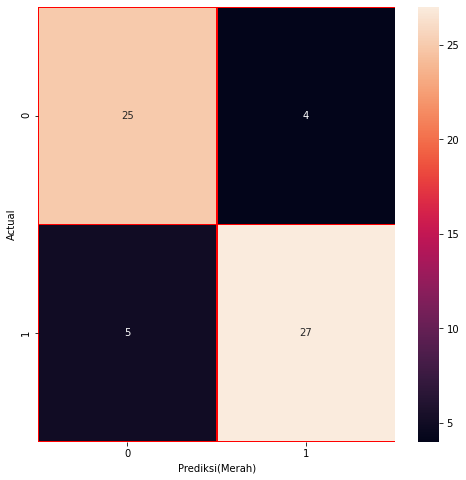

In [14]:
# Confusion Matrix
yprediksi= LR.predict(xtest.T)
ytrue = ytest.T

CM = confusion_matrix(ytrue,yprediksi)

#Confusion Matrix visualisasi

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediksi(Merah)")
plt.ylabel("Actual")
plt.show()

# K-Nearest Neighbour(KNN) Classification

In [15]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors artinya k
knn.fit(xtrain.T, ytrain.T)

print(" Test Accuracy KNN Score: {:.2f}%".format(knn.score(xtest.T, ytest.T)*100))

 Test Accuracy KNN Score: 73.77%


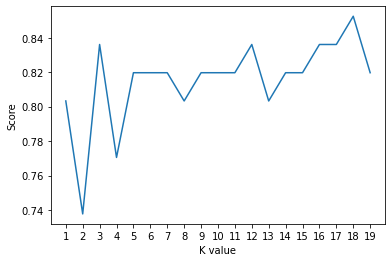

Maximum KNN Score is 85.25%


In [16]:
# mencari k value terbaik
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors artinya k
    knn2.fit(xtrain.T, ytrain.T)
    scoreList.append(knn2.score(xtest.T, ytest.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies = {}
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

# Support Vector Machine (SVM)

In [17]:
from sklearn import svm
svm = svm.SVC(kernel='linear')

svm.fit(xtrain.T, ytrain.T)

acc = svm.score(xtest.T,ytest.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 85.25%


# Naive Bayes 

In [18]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain.T, ytrain.T)

acc = nb.score(xtest.T,ytest.T)*100
accuracies['Naive Bayes'] = acc
print("Test Accuracy of Naive Bayes: {:.2f}%".format(acc))

Test Accuracy of Naive Bayes: 86.89%


# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split function
from sklearn.model_selection import train_test_split 

#Import scikit-learn metrics module untuk perhitungan akurasi
from sklearn.metrics import confusion_matrix, classification_report
dtc = DecisionTreeClassifier()
dtc.fit(xtrain.T, ytrain.T)

acc = dtc.score(xtest.T, ytest.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 85.25%


In [20]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(xtrain.T, ytrain.T)


DecisionTreeClassifier(max_depth=3)

In [21]:
print("Classification Report")
print(classification_report(ytest.T, model.predict(xtest.T)))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [22]:
print("Confusion Matrix")
confusion_matrix(ytest.T, model.predict(xtest.T))

Confusion Matrix


array([[24,  5],
       [ 6, 26]], dtype=int64)

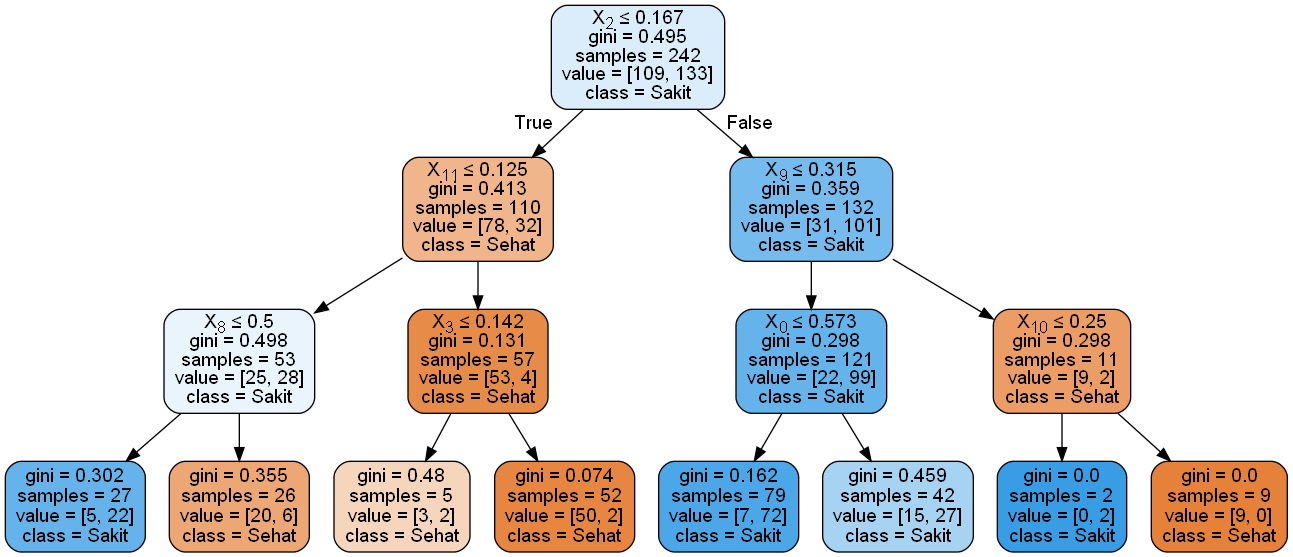

In [23]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz/bin/'

dot_data = StringIO()
tree.export_graphviz(model, 
 out_file =dot_data, 
 class_names = ['Sehat','Sakit'], # Nama target.
 filled = True, # untuk mengisi kotak dengan warna.
 rounded = True, # untuk membulatkan sudut kotak.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [24]:
xtrain.T.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

# Random Forest Classification

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(xtrain.T, ytrain.T)

acc = rf.score(xtest.T,ytest.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 86.89%


# Comparing Algorithm Models

In [26]:
# Prediksi Value
y_head_lr = LR.predict(xtest.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(xtrain.T, ytrain.T)
y_head_knn = knn3.predict(xtest.T)
y_head_svm = svm.predict(xtest.T)
y_head_nb = nb.predict(xtest.T)
y_head_dtc = dtc.predict(xtest.T)
y_head_rf = rf.predict(xtest.T)

In [27]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(ytest.T,y_head_lr)
cm_knn = confusion_matrix(ytest.T,y_head_knn)
cm_svm = confusion_matrix(ytest.T,y_head_svm)
cm_nb = confusion_matrix(ytest.T,y_head_nb)
cm_dtc = confusion_matrix(ytest.T,y_head_dtc)
cm_rf = confusion_matrix(ytest.T,y_head_rf)

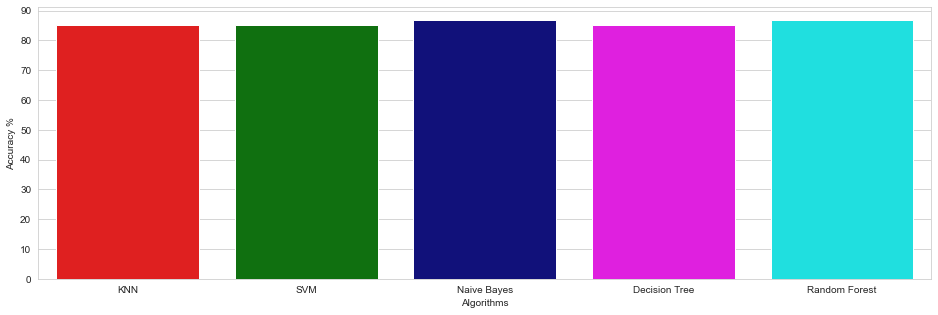

In [28]:
colors = ["red", "green", "darkblue", "magenta","cyan","orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

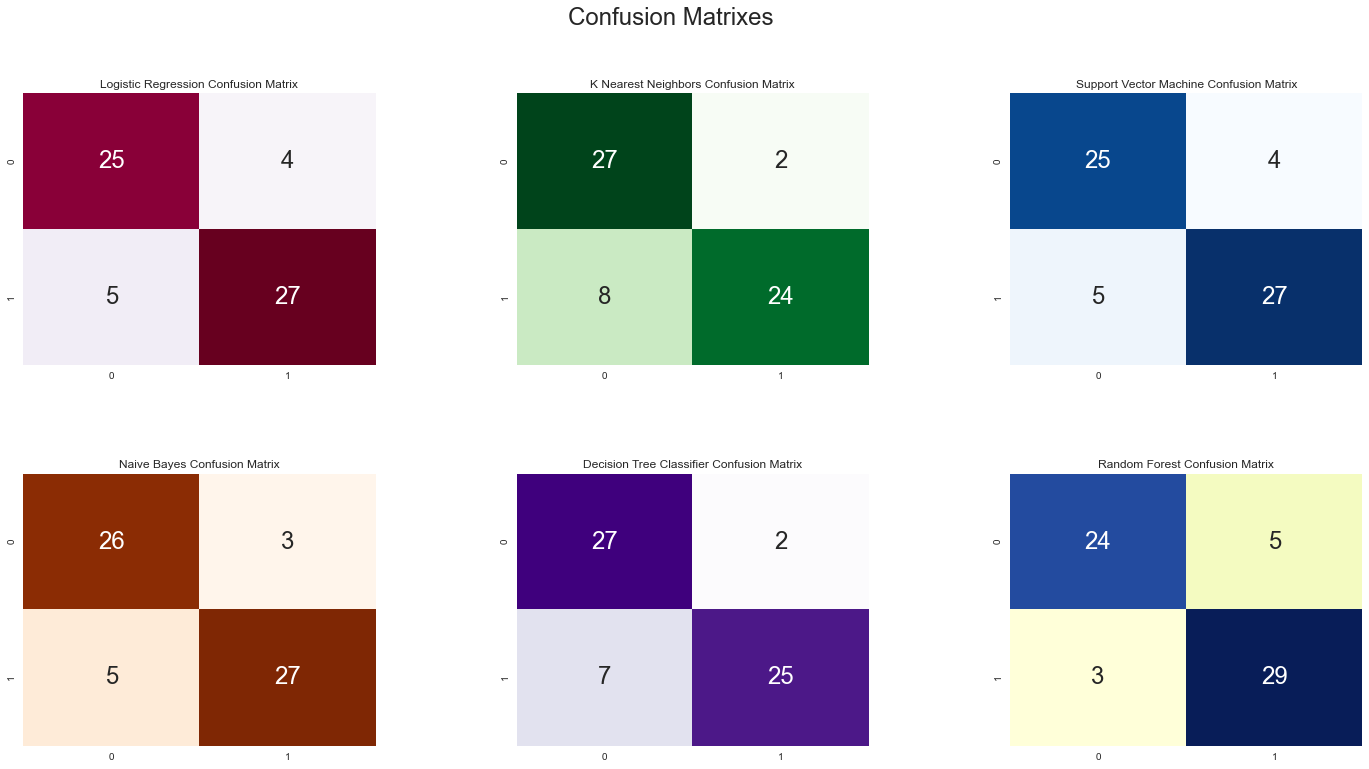

In [29]:
# Confusion Matrix
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="PuRd",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Oranges",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Purples",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

# Data Cleaning/ Data preprocessing

In [30]:
# Mengecheck apakah ada row yang duplikat di data tersebut
duplicate_rows = hrt[hrt.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (1, 14)


In [31]:
#kita memiliki 1 row yang duplikat.
# Mehilangkan row duplikat
hrt = hrt.drop_duplicates()
duplicate_rows = hrt[hrt.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)
#Number of duplicate rows after dropping one duplicate row

Number of duplicate rows ::  (0, 14)


In [32]:
# mencari null value
print("Null values :: ")
print(hrt.isnull() .sum())

Null values :: 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [33]:
# Periksa apakah data lainnya konsisten 
hrt.shape

(302, 14)

<AxesSubplot:xlabel='thal'>

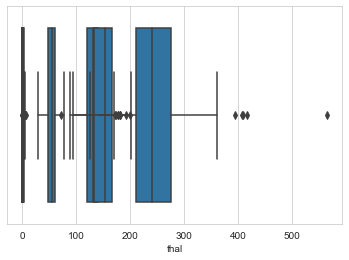

In [34]:
# Karena tidak ada nilai nol dalam data, kita dapat melanjutkan ke langkah berikutnya.
# mendeketsikan pencilan
# mendeketsikan pencilan mengunakan IQR (InterQuartile Range)
sns.boxplot(x=hrt['age'])
# Tidak ada Pencilan yang diamati di 'age'
sns.boxplot(x=hrt['sex'])
# Tidak ada Pencilan yang diamati di sex data
sns.boxplot(x=hrt['cp'])
# Tidak ada Pencilan yang diamati di 'cp'
sns.boxplot(x=hrt['trestbps'])
#Beberapa outlier diamati pada 'trestbps'. akan dihapus nanti
sns.boxplot(x=hrt['chol'])
#Beberapa outlier diamati pada di 'chol'. akan dihapus nanti
sns.boxplot(x=hrt['fbs'])
sns.boxplot(x=hrt['restecg'])
sns.boxplot(x=hrt['thalach'])
#Outliers yang ada di thalach
sns.boxplot(x=hrt['exang'])
sns.boxplot(x=hrt['oldpeak'])
#Outliers yang ada di 'OldPeak'
sns.boxplot(x=hrt['slope'])
sns.boxplot(x=hrt['ca'])
#Outliers yang ada di 'ca'
sns.boxplot(x=hrt['thal'])
#Outliers yang ada di 'thal'


In [35]:
# Mencari InterQuartile Range
Q1 = hrt.quantile(0.25)
Q3 = hrt.quantile(0.75)
IQR = Q3-Q1
print('*********** InterQuartile Range ***********')
print(IQR)
# mehilangkan outliner dengan IQR
hrt2 = hrt[~((hrt<(Q1-1.5*IQR))|(hrt>(Q3+1.5*IQR))).any(axis=1)]
hrt2.shape

*********** InterQuartile Range ***********
age         13.00
sex          1.00
cp           2.00
trestbps    20.00
chol        63.75
fbs          0.00
restecg      1.00
thalach     32.75
exang        1.00
oldpeak      1.60
slope        1.00
ca           1.00
thal         1.00
target       1.00
dtype: float64


(228, 14)